In [7]:
from pippi.oscs import Osc, Osc2d, Pulsar, Pulsar2d, Alias, Bar
from pippi import dsp, interpolation, wavetables, fx, oscs,soundpipe
from pippi.soundbuffer import SoundBuffer
from pippi.wavesets import Waveset
from pippi import dsp, fx
import random
import sounddevice as sd
from IPython.display import Audio
import librosa as lib
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from pippi import dsp, noise
import scipy
from helpers import *
import param_generation as pg
sr=44100
plt.figure(figsize=(8, 5))



<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [8]:
length = 3
osc = Osc("saw", freq=50.0)
out = osc.play(length).adsr(a=1, d=1, s=0, r=0)
out=lib.to_mono(np.transpose(np.array(out)))
# sd.play(out,blocking=True)

# Filter requirements.
order = 6
fs = sr       # sample rate, Hz
cutoff = 100  # desired cutoff frequency of the filter, Hz
y = butter_lowpass_filter(out, cutoff, fs, order)
sd.play(y)

<Figure size 576x360 with 0 Axes>

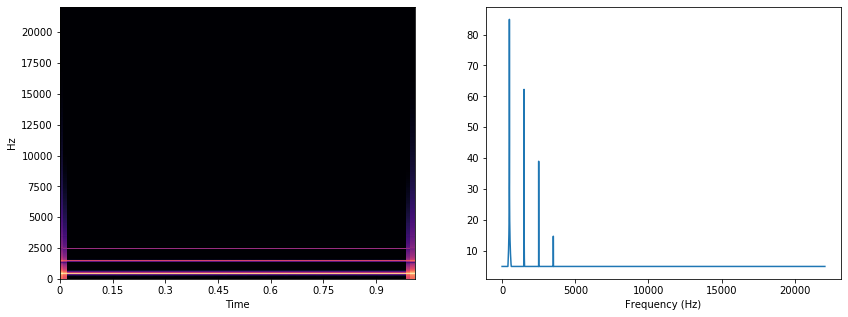

In [9]:
t = np.linspace(0, 2, num=44100)
wavetable = np.sin(np.sin(np.sin(500 * np.pi * t)))
wavetable2 = np.sin(500 * np.pi * t)
sd.play(wavetable,blocking=True)
specShow(wavetable)

##### Here's a bunch of synth examples:

CPU times: user 919 ms, sys: 23 ms, total: 942 ms
Wall time: 938 ms


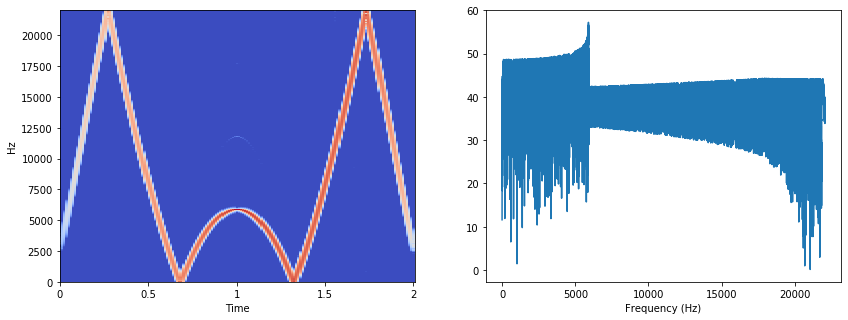

In [8]:
%%time
length = 2
osc = Osc('sine', freq=dsp.win('sine', 2500, 50000))
out = osc.play(length).adsr(a=10, d=1, s=0.5, r=1)
sd.play(out)
specShow(out)


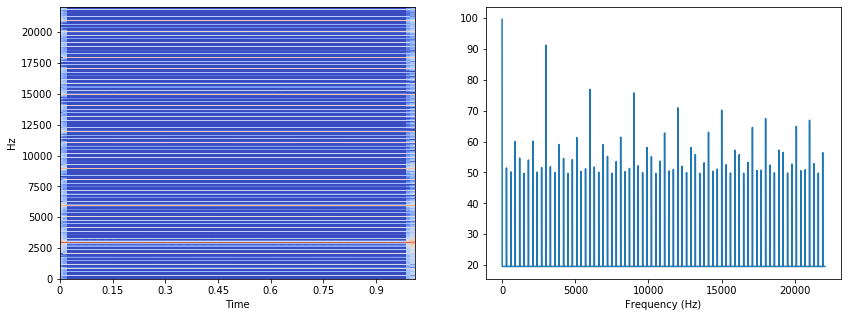

In [9]:
length = 1
wtA = [random.random() for _ in range(random.randint(1, 2)) ]
osc = Osc([3,0.3,5], freq=300.0)
out = osc.play(length)
sd.play(out,blocking=True)
specShow(out)


<Figure size 576x360 with 0 Axes>

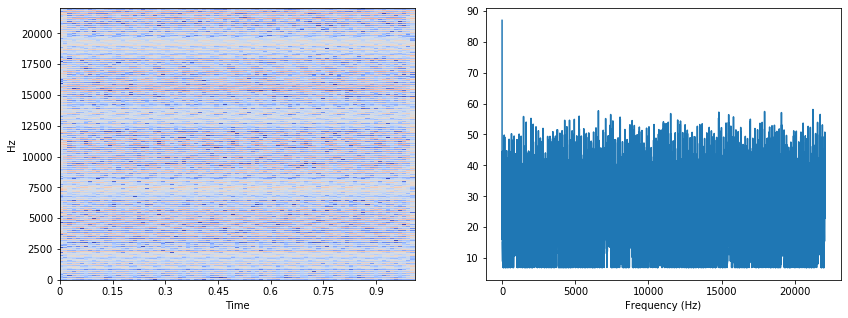

In [3]:
#randomly generated wavetable
wtA = [ random.random() for _ in range(random.randint(10, 1000)) ]
osc = Osc(wtA, freq=40.0)
length = 1
out = osc.play(length)
sd.play(out)
specShow(out)

In [4]:
length = 3
out = dsp.buffer(length=length)

lowf = dsp.win('rnd', 40, 1000)
highf = dsp.win('rnd', 1000, 15000)
out = noise.bln('sine', 2, 30,20000 )
# sd.play(out)
# specShow(out)
out

SoundBuffer(samplerate=44100, channels=2, frames=<MemoryView of '_memoryviewslice' object>)

<Figure size 576x360 with 0 Axes>

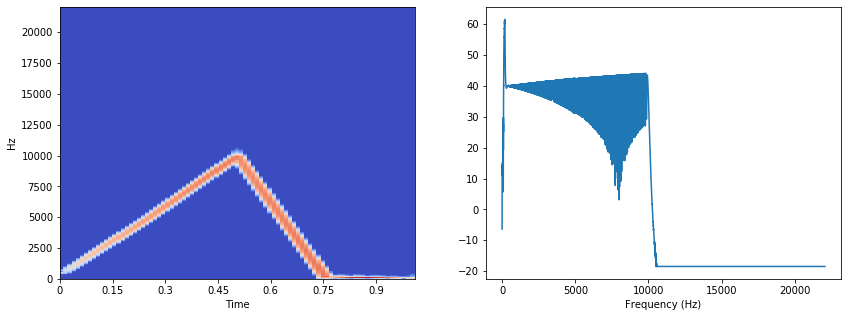

In [6]:
length = 1
osc = Osc("cos", freq=[400.0,5000,10000,200,100])
out = osc.play(length).adsr(a=10, d=1, s=0.5, r=1)
sd.play(out)
specShow(out)


<Figure size 576x360 with 0 Axes>

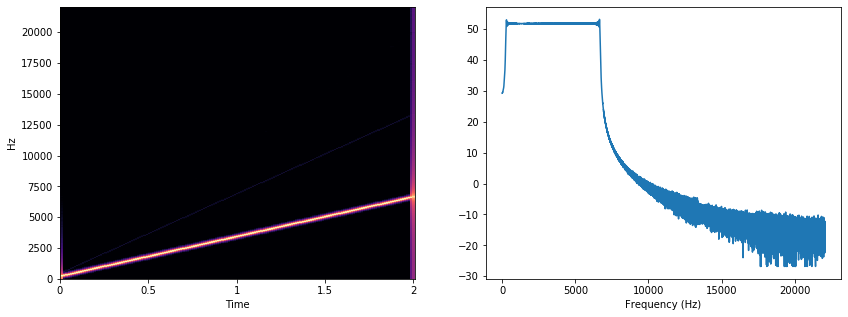

In [7]:
length = 2
a=dsp.win('saw', 250, 6700)
osc = Osc("sine", freq=a,channels=1)
out = osc.play(length)
# print(out)
sd.play(out)
specShow(out)


40000

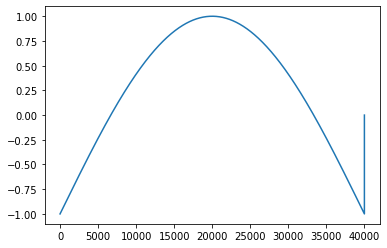

In [8]:
#how do windows work?
a=dsp.win('sine', -1, 1,40000)
plt.plot(a)
len(a)

#### some effects

<Figure size 576x360 with 0 Axes>

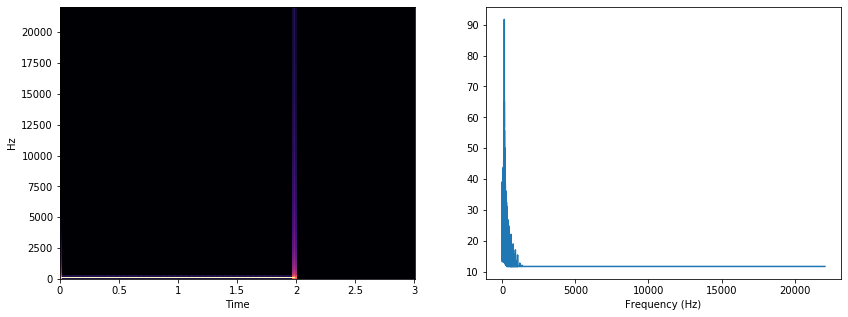

In [7]:
# no idea how vspeed works. What does the lfo do? 
length = 3
osc = Osc("sine", freq=100,channels=2)
out = osc.play(length)
lfo = dsp.win('saw', 100000)
snd = fx.vspeed(out, lfo, -1,1)
snd = fx.norm(snd, 1)
sd.play(snd.frames,samplerate=44100,blocking=True)
specShow(np.asarray(snd.frames))

<Figure size 576x360 with 0 Axes>

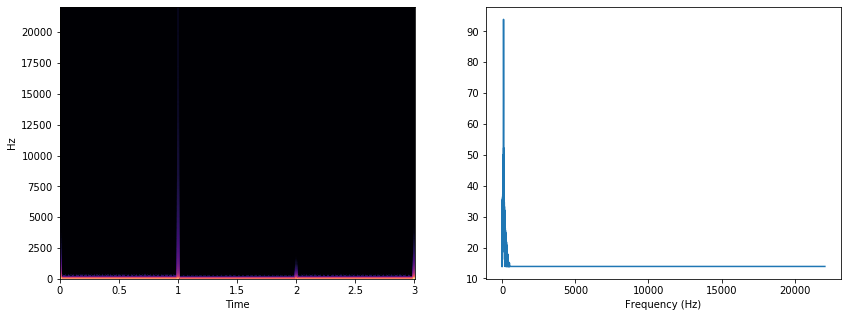

In [8]:
# delay
length = 3
osc = Osc("sine", freq=100,channels=1)
out = osc.play(length)
out = fx.delay(out, 1, 0.5)
out=fx.norm(out,1)
sd.play(out,blocking=True)
specShow(out)
# print(out[1])

In [12]:
p=pg.RandomParams()
s=pg.Synth(p)
sd.play(s.buff)
specShow(s.buff)
p.length

NameError: name 'Osc' is not defined

In [42]:
%%time

out = dsp.buffer(length=1)
for i in range(1): 
    p=pg.RandomParams()
    s=pg.Synth(p)
    out.dub(s.buff,p.start)

sd.play(out)
specShow(out)

NameError: name 'Osc' is not defined